<h1 style="text-align:center">Deep Learning  Lab Session </h1>
<h1 style="text-align:center">First Lab Session - 3 Hours </h1>
<h1 style="text-align:center">Artificial Neural Networks for Handwritten Digits Recognition</h1>

<b> Student 1:</b> Mohammed Saeed  
<b> Student 2:</b> Ana-Maria Tarca <br>
<b> Group name:</b> deeplearn18
 
 
The aim of this session is to practice with Artificial Neural Networks. Answers and experiments should be made by groups of two students. Each group should fill and run appropriate notebook cells. 

To generate your final report and upload it on the submission website http://bigfoot-m1.eurecom.fr/teachingsub/login (using your deeplearnXX/password). Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed ans submitted by April 13th 2018 (23:59:59 CET). 

# Introduction

During this lab session, you will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyperparameters. You will use the MNIST dataset which was constructed from scanned documents available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="Nimages/mnist.png",width="350" height="500" align="center">
<center><span>Figure 1: MNIST digits examples</span></center>


This assignment includes a written part of programms to help you understand how to build and train
your neural net and then to test your code and get results. 

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 


Functions defined inside the python files mentionned above can be imported  using the python command "from filename import function".

You will use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays;

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots.

Before starting the lab, please launch the cell below. After that, you may not need to do any imports during the lab.

In [1]:
# All imports
from NeuralNetwork import NeuralNetwork
from transfer_functions import *
from utils import *
import numpy as np
import matplotlib

# Section 1 :  Your First Neural Network

<b>Part 1</b>: Before designing and writing your code, you will first work on a neural network by hand. 
Consider the following neural network with two inputs $x=(x_1,x_2)$, one hidden layer and a single output unit $y$.
The initial weights are set to random values. Neurons 6 and 7 represent biases. Bias values are equal to 1. You will consider a training sample whose feature vector is $x = (0.8, 0.2)$ and whose label is $y = 0.4$.

Assume that neurons have a sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$. The loss function $L$ is a Mean Squared Error (MSE): if $o$ denotes the output of the neural network, then the loss for a given sample $(o, y)$ is $L(o, y) = \left|\left| o - y \right|\right|^2$. In the following, you will assume that if you want to backpropagate the error on a whole batch, you will backpropagate the average error on that batch. More formally, let $((x^{(1)}, y^{(1)}), ..., (x^{(N)}, y^{(N)}))$ be a batch and $o^{(k)}$ the output associated to $x^{(k)}$. Then the total error $\bar{L}$ will be as follows:

<div align="center">$\bar{L} = \frac{1}{N} \sum_{k=1}^{N} L(o^{(k)}, y^{(k)})$.</div>




<img src="Nimages/NN.png", width="700" height="900"> 
<center><span>Figure 2: Neural network </span></center>


<b>Question 1.1.1</b>: Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass, and the outputs of the neural network before and after the backward path, when the learning rate is $\lambda$=5.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$. Please detail your computations in the cell below and print your answers.

In [43]:
lr = 5.0
x1, x2, x6, x7 = 0.8, 0.2, 1.0, 1.0
w13, w14, w23, w24, w63, w64 = 0.3, -0.5, 0.8, 0.2, 0.2, -0.4
w35, w45, w75 = -0.6, 0.4, 0.5
y = 0.4



x3 = sigmoid(x1*w13+x2*w23+x6*w63) #output of neuron x3=sigmoid(weights*inputs -b)
x4 = sigmoid(x1*w14+x2*w24+x6*w64) #output pf neuron x4=sigmoid(weights*inputs -b)
x5 = sigmoid(x3*w35+x4*w45+x7*w75) #output of neuron x5=sigmoid(weights*inputs -b)

print("=== FORWARD PASS 1 ===")
print("Output =", x5)
print("hidden =", x3,x4)



e=(x5-y)**2 #error for first forward propagation

dE_du_output=2*(x5-y)*dsigmoid(x5)/1 #multiply by 2 since there is no "1/2" in the loss function
                                     #divide by "1" since the length of the targets is 1

    
    
d_w35 = dE_du_output*x3              #d_wij = dE_du_output*xi
d_w45 = dE_du_output*x4              #wij   = weights connected to output layer
d_w75 = dE_du_output*x7




d_w13 = dE_du_output*w35*dsigmoid(x3)*x1        #d_wij=dE_du_output*wi5*dsigmoid(xj)*xi
d_w14 = dE_du_output*w45*dsigmoid(x4)*x1
d_w23 = dE_du_output*w35*dsigmoid(x3)*x2
d_w24 = dE_du_output*w45*dsigmoid(x4)*x2
d_w63 = dE_du_output*w35*dsigmoid(x3)*x6
d_w64 = dE_du_output*w45*dsigmoid(x4)*x6

w13 -= lr*d_w13
w14 -= lr*d_w14
w23 -= lr*d_w23
w24 -= lr*d_w24
w63 -= lr*d_w63
w64 -= lr*d_w64
w35 -= lr*d_w35
w45 -= lr*d_w45
w75 -= lr*d_w75

print("=== BACKWARD PASS ===")
print("w13 =", w13)
print("w14 =", w14)
print("w23 =", w23)
print("w24 =", w24)
print("w63 =", w63)
print("w64 =", w64)
print("w35 =", w35)
print("w45 =", w45)
print("w75 =", w75)


x3 = sigmoid(x1*w13+x2*w23+x6*w63)
x4 = sigmoid(x1*w14+x2*w24+x6*w64)
x5 = sigmoid(x3*w35+x4*w45+x7*w75)

print("=== FORWARD PASS 2 ===")
print("Output =", x5)

=== FORWARD PASS 1 ===
Output = 0.5597295991095776
hidden = 0.6456563062257954 0.31864626621097447
=== BACKWARD PASS ===
w13 = 0.3400340485463861
w14 = -0.5288308086108153
w23 = 0.8100085121365965
w24 = 0.19279229784729618
w63 = 0.25004256068298264
w64 = -0.43603851076351924
w35 = -0.8386415045034468
w45 = 0.282224918056636
w75 = 0.13038926097007664
=== FORWARD PASS 2 ===
Output = 0.41562739140825555


 <div class="alert alert-success">
Let's do more iterations of <b>feedforward</b> and <b>backpropagation</b> to see if the output gets near to the target.</div>

=== FORWARD PASS 2 ===
Output = 0.41562739140825555
=== FORWARD PASS 3 ===
Output = 0.40113689485422116
=== FORWARD PASS 4 ===
Output = 0.40008315503637565
=== FORWARD PASS 5 ===
Output = 0.4000060864135249
=== FORWARD PASS 6 ===
Output = 0.4000004455098982
=== FORWARD PASS 7 ===
Output = 0.40000003261031136
=== FORWARD PASS 8 ===
Output = 0.4000000023870014
=== FORWARD PASS 9 ===
Output = 0.40000000017472315
=== FORWARD PASS 10 ===
Output = 0.40000000001278935
=== FORWARD PASS 11 ===
Output = 0.4000000000009362


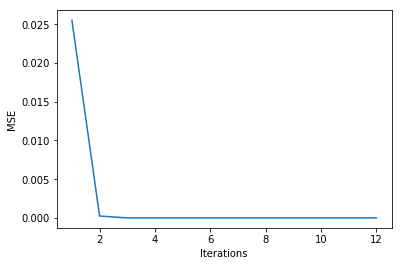

In [44]:
iterations=10
error=[]
error.append(e)
error.append((x5-y)**2)
for i in range(iterations):
    print("=== FORWARD PASS {} ===".format(i+2))
    print("Output =", x5)
    
    
    #BackPropagation
    
    dE_du_output=2*(x5-y)*dsigmoid(x5)/1 
                                     
    d_w35 = dE_du_output*x3              
    d_w45 = dE_du_output*x4              
    d_w75 = dE_du_output*x7

    d_w13 = dE_du_output*w35*dsigmoid(x3)*x1        
    d_w14 = dE_du_output*w45*dsigmoid(x4)*x1
    d_w23 = dE_du_output*w35*dsigmoid(x3)*x2
    d_w24 = dE_du_output*w45*dsigmoid(x4)*x2
    d_w63 = dE_du_output*w35*dsigmoid(x3)*x6
    d_w64 = dE_du_output*w45*dsigmoid(x4)*x6

    w13 -= lr*d_w13
    w14 -= lr*d_w14
    w23 -= lr*d_w23
    w24 -= lr*d_w24
    w63 -= lr*d_w63
    w64 -= lr*d_w64
    w35 -= lr*d_w35
    w45 -= lr*d_w45
    w75 -= lr*d_w75

    #Feedforward
    x3 = sigmoid(x1*w13+x2*w23+x6*w63)
    x4 = sigmoid(x1*w14+x2*w24+x6*w64)
    x5 = sigmoid(x3*w35+x4*w45+x7*w75)
    error.append((x5-y)**2)

    
plt.plot(np.arange(iterations+2)+1,error)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

 <div class="alert alert-success">
We can see that the error decreases significantly and we get a good output.</div>

<b>Part 2</b>: Neural Network Implementation

Please read all source files carefully and understand the data structures and all functions.
You are to complete the missing code. 
First you should define the neural network (using the NeuralNetwork class, see in the <a href="NeuralNetwork.py"> NeuralNetwork.py</a> file) and reinitialise weights. 
Then you will need to complete the feedforward() and the backpropagate() functions. 

<b>Question 1.2.1</b>: Implement the feedforward() function.

In [4]:
class NeuralNetwork(NeuralNetwork):
    def feedforward(self, inputs,transfer_f=sigmoid):
        
        #change inputs to np array
        inputs=np.array(inputs)
        
        #if the input doesn't contain "ones" for the bias then add them
        if(inputs.shape[1]<self.input_layer_size):
            inputs=np.column_stack((inputs,np.ones((inputs.shape[0],1))))
        

        self.o_input=inputs
        
        
        #hidden layer activation = output of previous layer multiplied by weights from input to hidden
        self.u_hidden=self.o_input.dot(self.W_input_to_hidden)
        
        
        #output of hidden layer=transfer_f(hidden)
        self.o_hidden=transfer_f(self.u_hidden)
        
        #we add a column of "ones" for the bias
        self.o_hidden=np.column_stack((self.o_hidden,np.ones((self.o_hidden.shape[0],1))))
        
        #output layer activation = output of previous layer multiplied by weights from hidden to output
        self.u_output=np.dot(self.o_hidden,self.W_hidden_to_output)
     
        #output of output layer=transfer_f(hidden)
        self.o_output=sigmoid(self.u_output)
        
        
        #DEBUGGING
        #print("Inputs=",inputs,inputs.shape)
        #print(self.o_input.shape)
        #print("hidden_u=",self.u_hidden.shape)
        #print("o_hidden=",self.o_hidden,self.o_hidden.shape)
        #print("W_h2o=",self.W_hidden_to_output.shape)  
        #print("u_output=",self.u_output.shape)
        #print("o_output=",self.o_output,self.o_output.shape)


<b>Question 1.2.2</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the feedforward() function you implemented gives the same results as the ones you found by hand.

In [5]:
# First define your neural network
model = NeuralNetwork(2,2,1)


# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3, -0.5] ,[0.8, 0.2],[0.2, -0.4]])
W_hidden_to_output = np.array([[-0.6], [0.4], [0.5]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)


# Feed test values
test = [[0.8, 0.2,1]]
model.feedforward(test)


# Print the output
print("Output =", model.o_output)

Output = [[0.5597296]]


<b>Question 1.2.3</b>: Implement the backpropagate() function.

In [6]:
class NeuralNetwork(NeuralNetwork):
    def backpropagate(self, targets, learning_rate=5.0,transfer_df=dsigmoid):
        
        #multiply by 2 because the loss function defined is not multiplied by "1/2"
        #divide by length of targets
        self.dE_du_output=2*(self.o_output-targets)*(transfer_df(self.o_output))/len(targets)
        
        #we need to remove the weights and outputs of the bias neurons
        self.dE_du_hidden=(self.dE_du_output.dot(self.W_hidden_to_output[:-1,:].T) *transfer_df(self.o_hidden[:,:-1]))
                                                       
        #update weights
        self.W_hidden_to_output -= learning_rate *(self.o_hidden.T.dot(self.dE_du_output))
        self.W_input_to_hidden  -= learning_rate*self.o_input.T.dot(self.dE_du_hidden)

        
        
        
        
        #DEBUGGING
        
        #print("Gradient ih=",learning_rate*self.o_input.T.dot(self.dE_du_hidden))[0]
        #print("dE/du_hidden=",(self.dE_du_hidden))
        #print("o_input",self.o_input)
        #print(self.dE_du_hidden)
        #print("Gradient_ho=",learning_rate *(self.o_hidden.T.dot(self.dE_du_output)))
        #print(self.dE_du_output)


<b>Question 1.2.4</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the backpropagate() function you implemented gives the same weight updates as the ones you found by hand. Do another forward pass and see if the new output is the same as the one you obtained in Question 1.1.1.

In [7]:
# First define your neural network
model = NeuralNetwork(2,2,1)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3, -0.5] ,[0.8, 0.2],[0.2, -0.4]])
#W_input_to_hidden = W_input_to_hidden.T
W_hidden_to_output = np.array([[-0.6],[0.4], [0.5]])
W_hidden_to_output=W_hidden_to_output
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Backpropagate
targets = [[0.4]]

model.backpropagate(targets)

# Print weights
print("W_input_to_hidden =", model.W_input_to_hidden)
print("W_hidden_to_output =", model.W_hidden_to_output)
# Feed test values again
model.feedforward(test)

# Print the output
print("Output =", model.o_output)

W_input_to_hidden = [[ 0.34003405 -0.52883081]
 [ 0.81000851  0.1927923 ]
 [ 0.25004256 -0.43603851]]
W_hidden_to_output = [[-0.8386415 ]
 [ 0.28222492]
 [ 0.13038926]]
Output = [[0.41562739]]


Checked your implementations and found that everything was fine? Congratulations! You can move to the next section.

# Section 2: Handwritten Digits Recognition

The MNIST dataset consists of handwritten digit images. It is split into a training set containing 60,000 samples and a test set containing 10,000 samples. In this Lab Session, the official training set of 60,000 images is divided into an actual training set of 50,000 samples a validation set of 10,000 samples. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. Images are stored in byte form: you will use the NumPy python library to convert data files into NumPy arrays that you will use to train your Neural Networks.

You will first work with a small subset of MNIST (1000 samples), then on a very small subset of MNIST (10 samples), and eventually run a model on the whole one.

The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the load_data() function.


In [8]:
# Just run that cell ;-)
training_data, validation_data, test_data = load_data()
small_training_data = (training_data[0][:1000], training_data[1][:1000])
small_validation_data = (validation_data[0][:200], validation_data[1][:200])
indices = [1, 3, 5, 7, 2, 0, 13, 15, 17, 4]
vsmall_training_data = ([training_data[0][i] for i in indices], [training_data[1][i] for i in indices])

Loading MNIST data .....
Done.


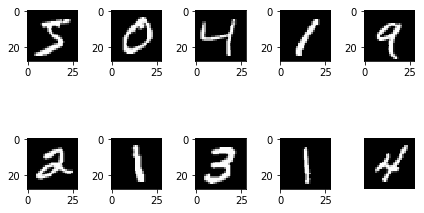

In [9]:
# And you can run that cell if you want to see what the MNIST dataset looks like
ROW = 2
COLUMN = 5
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = np.array(training_data[0][i]).reshape(28, 28)   
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

<b>Part 1</b>: Build a bigger Neural Network

The input layer of the neural network that you will build contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits. Thus, the input layer contains 784=28×28 units. The second layer of the network is a hidden layer. We set the number of neurons in the hidden layer to 30. The output layer contains 10 neurons.

<b>Question 2.1.1</b>: Create the network described above using the NeuralNetwork class.

In [17]:
# Define your neural network
mnist_model = NeuralNetwork(784,30,10)

<b>Question 2.1.2</b>: Train your Neural Network on the small subset of MNIST (300 iterations) and print the new accuracy on test data. You will use small_validation_data for validation. Try different learning rates (0.1, 1.0, 10.0). You should use the train() function of the NeuralNetwork class to train your network, and the weights_init() function to reinitialize weights between tests. Print the accuracy of each model on test data using the predict() function.

# Hidden Neurons = 30 , Learning Rate = 0.1
Training time: 16.51965880393982


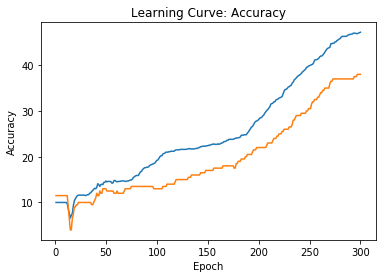

Accuracy = 40.35 %
***********************************************************
# Hidden Neurons = 30 , Learning Rate=1
Training time: 16.35564351081848


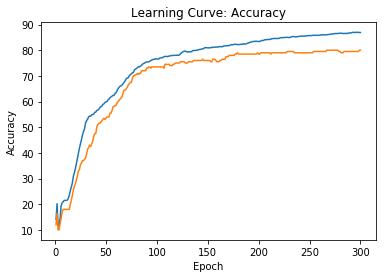

Accuracy = 80.5 %
***********************************************************
# Hidden Neurons = 30 , Learning Rate=10


/mnt/workspace/Lab1/transfer_functions.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Training time: 16.297704219818115


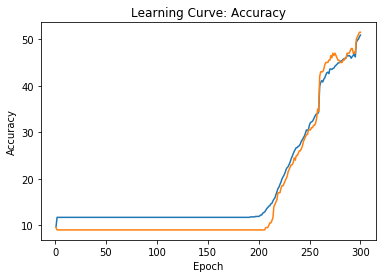

Accuracy = 48.7 %
***********************************************************


In [18]:
# Train NN and print accuracy on test data
# Learning rate 0.1
print("# Hidden Neurons = 30 , Learning Rate = 0.1")
mnist_model.weights_init()
mnist_model.train(small_training_data,small_validation_data,learning_rate=0.1,iterations=300)
print("Accuracy =",100*mnist_model.predict(test_data)/len(test_data[0]),"%")
print("***********************************************************")
# Learning rate 1.
print("# Hidden Neurons = 30 , Learning Rate=1")
mnist_model.weights_init()
mnist_model.train(small_training_data,small_validation_data,learning_rate=1,iterations=300)
print("Accuracy =",100*mnist_model.predict(test_data)/len(test_data[0]),"%")
print("***********************************************************")
# Learning rate 10.
print("# Hidden Neurons = 30 , Learning Rate=10")
mnist_model.weights_init()
mnist_model.train(small_training_data,small_validation_data,learning_rate=10,iterations=300)
print("Accuracy =",100*mnist_model.predict(test_data)/len(test_data[0]),"%")
print("***********************************************************")


 <div class="alert alert-success">
We see that with a learning rate of <b>0.1</b>, the neural network had a low accuracy while with a learning rate of <b>1</b> the neural network had a high accuracy. This is due to the fact that with a lower learning rate we can achieve better results if we have much more iterations as the error converges to a minimum with very small steps that need many iterations.<br><br>
With a learning rate of <b>10</b>, the neural network didn't do good. This is because of the high learning rate that takes very large steps that skip where the local minimum is.<br><br>
We see that the best here is a learning rate of <b>1</b>.
</div>

<b>Question 2.1.3</b>: Do the same with 15 and 75 hidden neurons.

# Hidden Neurons = 15 , Learning Rate = 0.1
Training time: 15.382831573486328


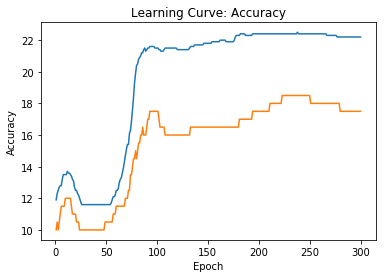

Accuracy = 20.92 %
***********************************************************
# Hidden Neurons = 15 , Learning Rate = 1
Training time: 15.482372760772705


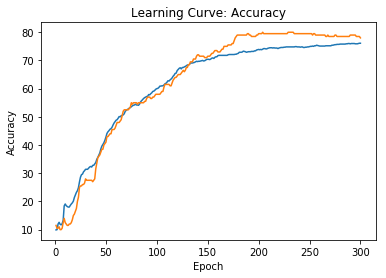

Accuracy = 72.26 %
***********************************************************
# Hidden Neurons = 15 , Learning Rate = 10


/mnt/workspace/Lab1/transfer_functions.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Training time: 15.411959171295166


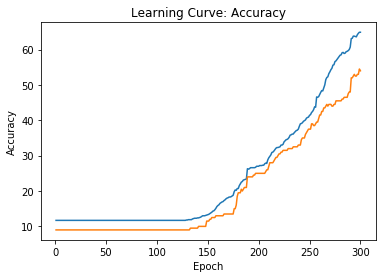

Accuracy = 60.84 %
***********************************************************
# Hidden Neurons = 75 , Learning Rate = 0.1
Training time: 19.190940856933594


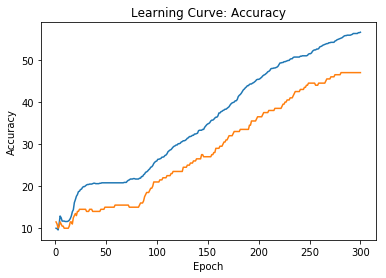

Accuracy = 51.42 %
***********************************************************
# Hidden Neurons = 75 , Learning Rate = 1
Training time: 19.61791753768921


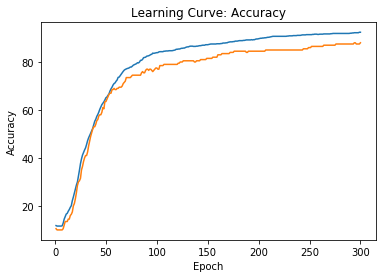

Accuracy = 85.83 %
***********************************************************
# Hidden Neurons = 75 , Learning Rate = 10
Training time: 19.93242120742798


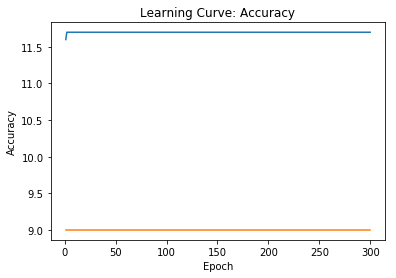

Accuracy = 10.28 %
***********************************************************


In [22]:
# Define your neural network
# 15 hidden neurons 
mnist_model = NeuralNetwork(784,15,10)
# Learning rate 0.1
print("# Hidden Neurons = 15 , Learning Rate = 0.1")
mnist_model.weights_init()
mnist_model.train(small_training_data,small_validation_data,learning_rate=0.1,iterations=300)
print("Accuracy =",100*mnist_model.predict(test_data)/len(test_data[0]),"%")
print("***********************************************************")
# Learning rate 1.
print("# Hidden Neurons = 15 , Learning Rate = 1")
mnist_model.weights_init()
mnist_model.train(small_training_data,small_validation_data,learning_rate=1,iterations=300)
print("Accuracy =",100*mnist_model.predict(test_data)/len(test_data[0]),"%")
print("***********************************************************")

# Learning rate 10.
print("# Hidden Neurons = 15 , Learning Rate = 10")
mnist_model.weights_init()
mnist_model.train(small_training_data,small_validation_data,learning_rate=10,iterations=300)
print("Accuracy =",100*mnist_model.predict(test_data)/len(test_data[0]),"%")
print("***********************************************************")

# 75 hidden neurons
mnist_model = NeuralNetwork(784,75,10)
# Learning rate 0.1
print("# Hidden Neurons = 75 , Learning Rate = 0.1")
mnist_model.weights_init()
mnist_model.train(small_training_data,small_validation_data,learning_rate=0.1,iterations=300)
print("Accuracy =",100*mnist_model.predict(test_data)/len(test_data[0]),"%")
print("***********************************************************")

# Learning rate 1.
print("# Hidden Neurons = 75 , Learning Rate = 1")
mnist_model.weights_init()
mnist_model.train(small_training_data,small_validation_data,learning_rate=1,iterations=300)
print("Accuracy =",100*mnist_model.predict(test_data)/len(test_data[0]),"%")
print("***********************************************************")

# Learning rate 10.
print("# Hidden Neurons = 75 , Learning Rate = 10")
mnist_model.weights_init()
mnist_model.train(small_training_data,small_validation_data,learning_rate=10,iterations=300)
print("Accuracy =",100*mnist_model.predict(test_data)/len(test_data[0]),"%")
print("***********************************************************")



<b>Question 2.1.4</b>: Repeat Questions 2.1.2 and 2.1.3 on the very small datasets. You will use small_validation_data for validation.

Number of Hidden Layers= 30
Learning Rate= 0.1
Training time: 1.4566662311553955


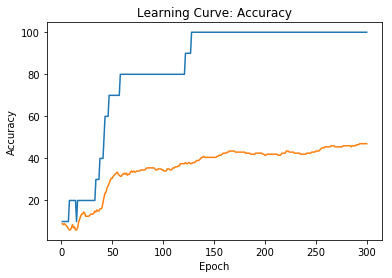

Accuracy = 46.67 %
***********************************************************
Number of Hidden Layers= 30
Learning Rate= 1
Training time: 1.4374988079071045


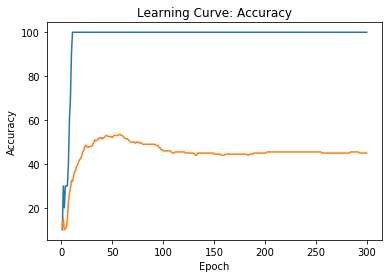

Accuracy = 41.1 %
***********************************************************
Number of Hidden Layers= 30
Learning Rate= 10
Training time: 1.46221923828125


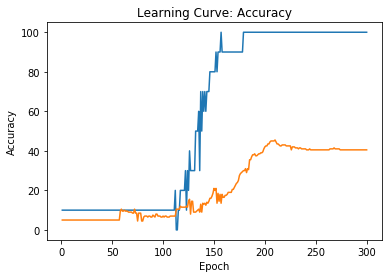

/mnt/workspace/Lab1/transfer_functions.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy = 37.54 %
***********************************************************
Number of Hidden Layers= 15
Learning Rate= 0.1
Training time: 1.4360480308532715


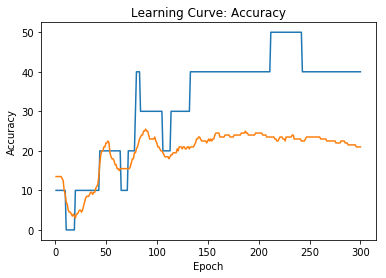

Accuracy = 21.79 %
***********************************************************
Number of Hidden Layers= 15
Learning Rate= 1
Training time: 1.3711698055267334


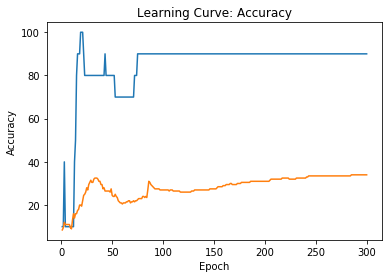

Accuracy = 30.17 %
***********************************************************
Number of Hidden Layers= 15
Learning Rate= 10
Training time: 1.389782190322876


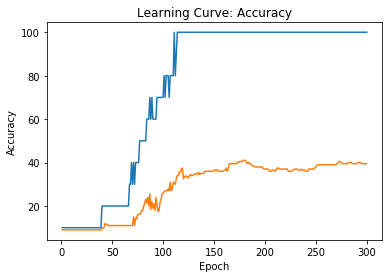

Accuracy = 39.33 %
***********************************************************
Number of Hidden Layers= 75
Training time: 1.716017246246338


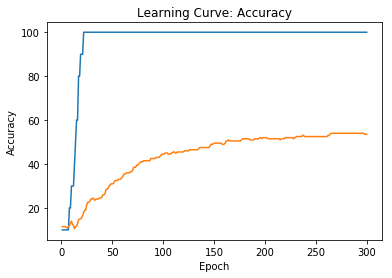

Accuracy = 50.95 %
***********************************************************
Number of Hidden Layers= 75
Learning Rate= 1
Training time: 1.7924854755401611


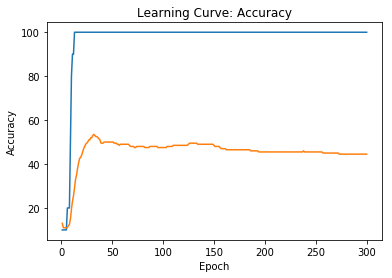

Accuracy = 45.16 %
***********************************************************
Number of Hidden Layers= 75
Learning Rate= 10
Training time: 1.7837114334106445


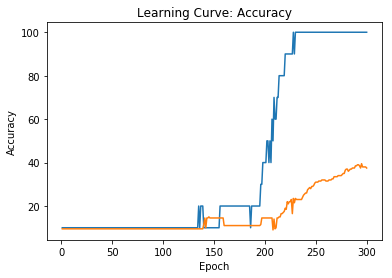

Accuracy = 33.48 %
***********************************************************


In [20]:
# Train NN and print accuracy on test data
# 30 hidden neurons
mnist_model = NeuralNetwork(784,30,10)
# Learning rate 0.1
print("Number of Hidden Layers=",mnist_model.hidden_layer_size-1)
print("Learning Rate=",0.1)
mnist_model.weights_init()
mnist_model.train(vsmall_training_data,small_validation_data,learning_rate=0.1,iterations=300)
print("Accuracy =",100*mnist_model.predict(test_data)/len(test_data[0]),"%")
print("***********************************************************")

# Learning rate 1.
print("Number of Hidden Layers=",mnist_model.hidden_layer_size-1)
print("Learning Rate=",1)
mnist_model.weights_init()
mnist_model.train(vsmall_training_data,small_validation_data,learning_rate=1,iterations=300)
print("Accuracy =",100*mnist_model.predict(test_data)/len(test_data[0]),"%")
print("***********************************************************")

# Learning rate 10.
print("Number of Hidden Layers=",mnist_model.hidden_layer_size-1)
print("Learning Rate=",10)
mnist_model.weights_init()
mnist_model.train(vsmall_training_data,small_validation_data,learning_rate=10,iterations=300)
print("Accuracy =",100*mnist_model.predict(test_data)/len(test_data[0]),"%")
print("***********************************************************")


# 15 hidden neurons

mnist_model = NeuralNetwork(784,15,10)
# Learning rate 0.1
print("Number of Hidden Layers=",mnist_model.hidden_layer_size-1)
print("Learning Rate=",0.1)
mnist_model.weights_init()
mnist_model.train(vsmall_training_data,small_validation_data,learning_rate=0.1,iterations=300)
print("Accuracy =",100*mnist_model.predict(test_data)/len(test_data[0]),"%")
print("***********************************************************")

# Learning rate 1.
print("Number of Hidden Layers=",mnist_model.hidden_layer_size-1)
print("Learning Rate=",1)
mnist_model.weights_init()
mnist_model.train(vsmall_training_data,small_validation_data,learning_rate=1,iterations=300)
print("Accuracy =",100*mnist_model.predict(test_data)/len(test_data[0]),"%")
print("***********************************************************")

# Learning rate 10.
print("Number of Hidden Layers=",mnist_model.hidden_layer_size-1)
print("Learning Rate=",10)
mnist_model.weights_init()
mnist_model.train(vsmall_training_data,small_validation_data,learning_rate=10,iterations=300)
print("Accuracy =",100*mnist_model.predict(test_data)/len(test_data[0]),"%")
print("***********************************************************")


# 75 hidden neurons
mnist_model = NeuralNetwork(784,75,10)
# Learning rate 0.1
print("Number of Hidden Layers=",mnist_model.hidden_layer_size-1)
mnist_model.weights_init()
mnist_model.train(vsmall_training_data,small_validation_data,learning_rate=0.1,iterations=300)
print("Accuracy =",100*mnist_model.predict(test_data)/len(test_data[0]),"%")
print("***********************************************************")

# Learning rate 1.
print("Number of Hidden Layers=",mnist_model.hidden_layer_size-1)
print("Learning Rate=",1)
mnist_model.weights_init()
mnist_model.train(vsmall_training_data,small_validation_data,learning_rate=1,iterations=300)
print("Accuracy =",100*mnist_model.predict(test_data)/len(test_data[0]),"%")
print("***********************************************************")

# Learning rate 10.
print("Number of Hidden Layers=",mnist_model.hidden_layer_size-1)
print("Learning Rate=",10)
mnist_model.weights_init()
mnist_model.train(vsmall_training_data,small_validation_data,learning_rate=10,iterations=300)
print("Accuracy =",100*mnist_model.predict(test_data)/len(test_data[0]),"%")
print("***********************************************************")


<b>Question 2.1.5</b>: Explain the results you obtained at Questions 2.1.2, 2.1.3 and 2.1.4.

 <div class="alert alert-success">
<b><u>Question 2.1.2</u></b><br>

We see that the best accuracy is produced by a learning rate of <b>1</b> for 300 iterations. The learning rate <b>0.1</b> needs more iterations to produce a better result because the gradient of the error with respect to the weights is progressing in small steps and needs more iterations to reach the local minimum. While, the learning rate of <b>10</b> is progressing in very large steps that miss the actual minimum.

<br><br>



<b><u>Question 2.1.3</u></b><br>

With a number of hidden layers equal to <b>15</b>, we see that the neural network performs worse than the neural network with <b> 30 </b> hidden layers. This is because with lower hidden layers, the neural network can't learn more features from the images we provide and thus will perform worse.<br>
 
On the contrary, we can see that with <b>75</b> hidden neurons, the neural network gave better results with learning rate of <b>0.1</b> & <b>1</b>. This is due to the fact that with more hidden layers, the neural network learns more features about the data that help it classify better the images.

<br><br>





<b><u>Question 2.1.4</u></b><br>
We see that with very small training sets, the neural network performs worse. That is because the neural network learns only the features specific to the given data and thus overfits the training data as seen in the curves. Thus,the neural network doesn't learn the necessary features required to classify images and performs bad on the test data.
</div>


<b>Question 2.1.6</b>: Among all the numbers of hidden neurons and learning rates you tried in previous questions, which ones would you expect to achieve best performances on the whole dataset? Justify your answer.

 <div class="alert alert-success">


We can see that for 300 iterations, the most suitable learning rate is <b>1</b>.
Also,the neural nework can learn more features with more hidden laeyrs.<br>
Thus the best performance would be a neural network with a learning rate of <b>1</b> and <b>75</b> hidden neurons.
</div>


<b>Question 2.1.7</b>: Train a model with the number of hidden neurons and the learning rate you chose in Question 2.1.6 and print its accuracy on the test set. You will use validation_data for validation. Training can be long on the whole dataset (~40 minutes): we suggest that you work on the optional part while waiting for the training to finish.

Training time: 1097.3145785331726


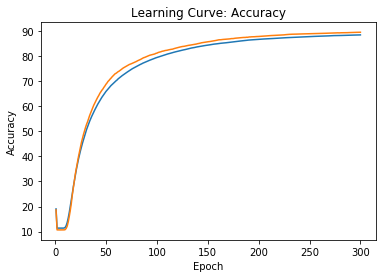

Accuracy = 89.5 %


In [23]:
mnist_model = NeuralNetwork(784,75,10)
mnist_model.weights_init()
mnist_model.train(training_data,validation_data,learning_rate=1,iterations=300)
print("Accuracy =",100*mnist_model.predict(test_data)/len(test_data[0]),"%")


 <div class="alert alert-success">

We can see that with  more data,the neural network had better accuracy as it learned more features.
</div>


 <div class="alert alert-success">

Let's train with more iterations just for experiment.</div>


# Hidden Neurons = 75 , Learning Rate=1
Training time: 702.4132132530212


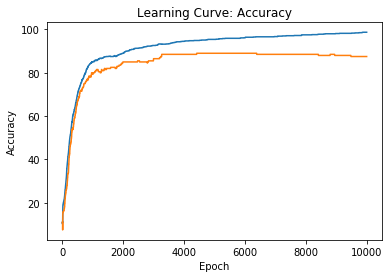

Accuracy = 86.24 %
***********************************************************


In [45]:
m = NeuralNetwork(784,75,10)
print("# Hidden Neurons = 75 , Learning Rate=1")
m.weights_init()
m.train(small_training_data,small_validation_data,learning_rate=0.1,iterations=10000)
print("Accuracy =",100*m.predict(test_data)/len(test_data[0]),"%")
print("***********************************************************")

 <div class="alert alert-success">

With a higher number of iterations, doesn't mean that the neural network will perform better, instead it will be more susceptible to overfit the training data.</div>


 <div class="alert alert-success">

Let's try with mini-batch gradient descent!</div>


In [29]:
import random
import time

In [30]:
import random
class NeuralNetwork(NeuralNetwork):
    def train_mb(self, data, validation_data, iterations=50, learning_rate=5.0, verbose=False,mb=100):
        start_time = time.time()
        training_accuracies = []
        validation_accuracies = []
        errors = []
        best_val_acc = 100*self.predict(validation_data)/len(validation_data[0])
        best_i2h_W = self.W_input_to_hidden
        best_h2o_W = self.W_hidden_to_output
        
        mb_inputs=small_training_data[0][:]
        mb_targets=small_training_data[1][:]
        
        for it in range(iterations):
            
            mb_inputs=np.array(mb_inputs)
            mb_targets=np.array(mb_targets)
            rand_ind=np.array(random.sample(range(len(mb_inputs)),mb))
            
            inputs  = mb_inputs[rand_ind]
            targets = mb_targets[rand_ind]


            self.feedforward(inputs)
            self.backpropagate(targets, learning_rate=learning_rate)
            error = targets - self.o_output
            error *= error
            training_accuracies.append(100*self.predict(data)/len(data[0]))
            validation_accuracies.append(100*self.predict(validation_data)/len(validation_data[0]))
            if validation_accuracies[-1] > best_val_acc:
                best_i2h_W = self.W_input_to_hidden
                best_h2o_W = self.W_hidden_to_output
            if verbose:
                print("[Iteration %2d/%2d]  -Training_Accuracy:  %2.2f %%  -Validation_Accuracy: %2.2f %%  -time: %2.2f " %(it+1, iterations,
                                                            training_accuracies[-1], validation_accuracies[-1], time.time() - start_time))
                print("    - MSE:", np.sum(error)/len(targets))
        print("Training time:", time.time()-start_time)
        plot_train_val(range(1, iterations+1), training_accuracies, validation_accuracies, "Accuracy")

 <div class="alert alert-success">

We will use the optimal parameters from the previous questions and try various batch sizes.
</div>


# Hidden Neurons = 75 , Learning Rate = 1 , mini-batch size = 1
Training time: 43.77605962753296


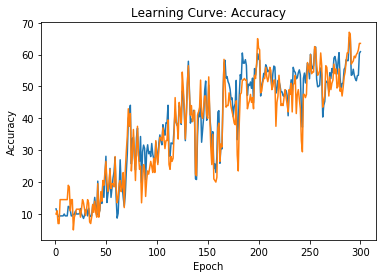

Accuracy = 58.05 %
***********************************************************
# Hidden Neurons = 75 , Learning Rate = 1 , mini-batch size = 10
Training time: 10.582406520843506


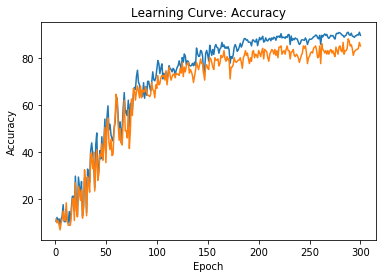

Accuracy = 81.22 %
***********************************************************
# Hidden Neurons = 75 , Learning Rate = 1 , mini-batch size = 50
Training time: 11.21616244316101


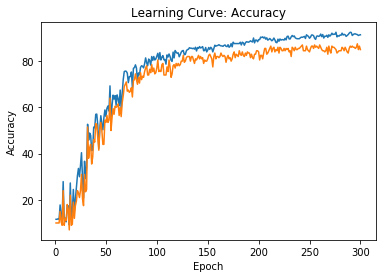

Accuracy = 85.4 %
***********************************************************
# Hidden Neurons = 75 , Learning Rate = 1 , mini-batch size = 200
Training time: 12.333434343338013


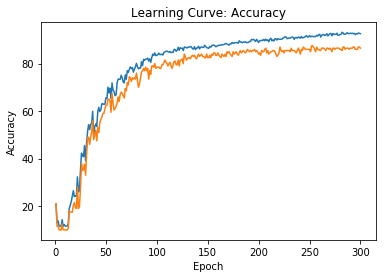

Accuracy = 86.22 %
***********************************************************
# Hidden Neurons = 75 , Learning Rate = 1 , mini-batch size = 500
Training time: 13.485160112380981


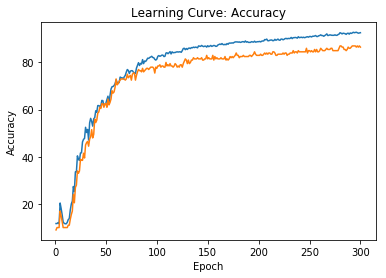

Accuracy = 85.99 %
***********************************************************
# Hidden Neurons = 75 , Learning Rate = 1 , mini-batch size = 1000
Training time: 16.705262422561646


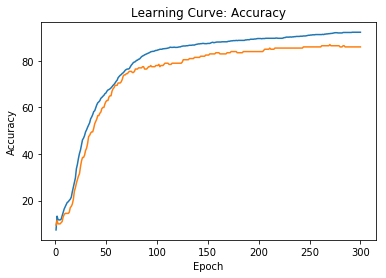

Accuracy = 86.15 %
***********************************************************


In [35]:
mb=[1,10,50,200,500,1000]
mnist_model=NeuralNetwork(784,75,10)
for mb_ in mb:
    mnist_model.weights_init()
    print("# Hidden Neurons = 75 , Learning Rate = 1 , mini-batch size = {}".format(mb_))
    mnist_model.train_mb(small_training_data,small_validation_data,learning_rate=1,iterations=300,mb=mb_)
    print("Accuracy =",100*mnist_model.predict(test_data)/len(test_data[0]),"%")
    print("***********************************************************")


 <div class="alert alert-success">

We see that Mini-Batch Gradient Descent is much faster than the Full-Batch Gradient Descent.</div>


<b>Part 2 (optional)</b>: Another loss function

In classification problems, we usually replace the sigmoids in the output layer by a "softmax" function and the MSE loss by a "cross-entropy" loss. More formally, let $u = (u_1, ..., u_n)$ be the vector representing the activation of the output layer of a Neural Network. The output of that neural network is $o = (o_1, ..., o_n) = \textrm{softmax}(u)$, and

<div align="center">$\textrm{softmax}(u) = (\frac{e^{u_1}}{\sum_{k=1}^n e^{u_k}}, ..., \frac{e^{u_n}}{\sum_{k=1}^n e^{u_k}})$.</div>

If $t = (t_1, ..., t_n)$ is a vector of non-negative targets such that $\sum_{k=1}^n t_k = 1$ (which is the case in classification problems, where one target is equal to 1 and all others are equal to 0), then the cross-entropy loss is defined as follows:

<div align="center">$L_{xe}(o, t) = - \sum_{k=1}^n t_k\log(o_k)$.</div>

<b>Question 2.2.1</b>: Let $L_{xe}$ be the cross-entropy loss function and $u_i$, $i \in \lbrace 1, ..., n \rbrace$, be the activations of the output neurons. Let us assume that the transfer function of the output neurons is the softmax function. Targets are $t_1, ..., t_n$. Derive a formula for $\frac{\partial L_{xe}}{\partial u_i}$ (details of your calculations are not required).

Answer: $\frac{\partial L_{xe}}{\partial u_i} = o_i - t_i $ 

<b>Question 2.2.2</b>: Implement a new feedforward() function and a new backpropagate() function adapted to the cross-entropy loss instead of the MSE loss.

In [32]:
class NeuralNetwork(NeuralNetwork):
    def feedforward_xe(self, inputs,transfer_f=softmax):
        
        #change inputs to np array
        inputs=np.array(inputs)
        
        #if the input doesn't contain "ones" for the bias then add them
        if(inputs.shape[1]<self.input_layer_size):
            inputs=np.column_stack((inputs,np.ones((inputs.shape[0],1))))
        

        self.o_input=inputs
        
        
        #hidden layer activation = output of previous layer multiplied by weights from input to hidden
        self.u_hidden=self.o_input.dot(self.W_input_to_hidden)
        
        
        #output of hidden layer=transfer_f(hidden)
        self.o_hidden=sigmoid(self.u_hidden)
        
        #we add a column of "ones" for the bias
        self.o_hidden=np.column_stack((self.o_hidden,np.ones((self.o_hidden.shape[0],1))))
        
        #output layer activation = output of previous layer multiplied by weights from hidden to output
        self.u_output=np.dot(self.o_hidden,self.W_hidden_to_output)
     
        #output of output layer=transfer_f(hidden)
        self.o_output=transfer_f(self.u_output)
        
        
        

        
        
class NeuralNetwork(NeuralNetwork):
    def backpropagate_xe(self, targets, learning_rate=5.0,transfer_f=softmax):
        
        #divide by length of targets
        self.dE_du_output=(self.o_output-targets)/len(targets)
        
        #we need to remove the weights and outputs of the bias neurons
        self.dE_du_hidden=(self.dE_du_output.dot(self.W_hidden_to_output[:-1,:].T) *dsigmoid(self.o_hidden[:,:-1]))
                                                       
        #update weights
        self.W_hidden_to_output -= learning_rate *(self.o_hidden.T.dot(self.dE_du_output))
        self.W_input_to_hidden  -= learning_rate*self.o_input.T.dot(self.dE_du_hidden)
        
        


<b>Question 2.2.3</b>: Create a new Neural Network with the same architecture as in Question 2.1.1 and train it using the softmax cross-entropy loss.

# Hidden Neurons = 30 , Learning Rate = 0.1
Training time: 19.65206289291382


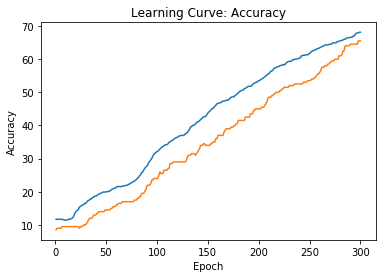

Accuracy = 62.98 %
***********************************************************
# Hidden Neurons = 30 , Learning Rate=1
Training time: 18.597317218780518


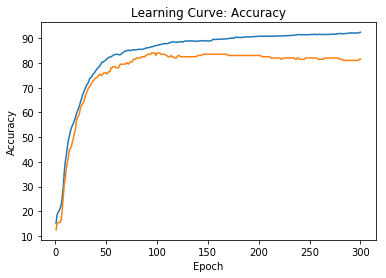

Accuracy = 82.66 %
***********************************************************
# Hidden Neurons = 30 , Learning Rate=10


/mnt/workspace/Lab1/transfer_functions.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Training time: 18.458582639694214


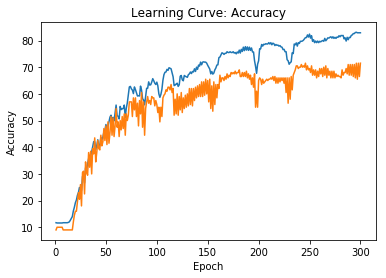

Accuracy = 71.24 %
***********************************************************


In [40]:
# Define your neural network
mnist_model_xe = NeuralNetwork(784,30,10)

# Train NN and print accuracy on test data
# Learning rate 0.1
print("# Hidden Neurons = 30 , Learning Rate = 0.1")
mnist_model_xe.weights_init()
mnist_model_xe.train_xe(small_training_data,small_validation_data,learning_rate=0.1,iterations=300)
print("Accuracy =",100*mnist_model_xe.predict(test_data)/len(test_data[0]),"%")
print("***********************************************************")
# Learning rate 1.
print("# Hidden Neurons = 30 , Learning Rate=1")
mnist_model_xe.weights_init()
mnist_model_xe.train_xe(small_training_data,small_validation_data,learning_rate=1,iterations=300)
print("Accuracy =",100*mnist_model_xe.predict(test_data)/len(test_data[0]),"%")
print("***********************************************************")
# Learning rate 10.
print("# Hidden Neurons = 30 , Learning Rate=10")
mnist_model_xe.weights_init()
mnist_model_xe.train_xe(small_training_data,small_validation_data,learning_rate=10,iterations=300)
print("Accuracy =",100*mnist_model_xe.predict(test_data)/len(test_data[0]),"%")
print("***********************************************************")


<b>Question 2.2.4</b>: Compare your results with the MSE loss and with the cross-entropy loss.

 <div class="alert alert-success">

With SoftMax and Cross-Entropy, the neural network performs better in overall for the 10000 samples with 300 iterations. As a consequence, considering the entropy loss function and the soft max function on the last layer perform better for classification problems.

</div>


 <div class="alert alert-success">

Let's train with the full data set.</div>


Training time: 1144.4766750335693


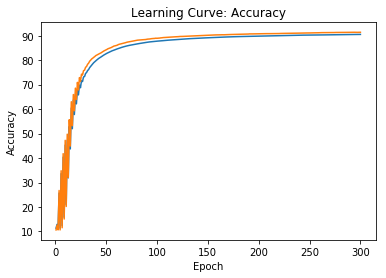

Accuracy = 91.2 %


In [41]:
mnist_model_xe = NeuralNetwork(784,75,10)
mnist_model_xe.weights_init()
mnist_model_xe.train_xe(training_data,validation_data,learning_rate=1,iterations=300)
print("Accuracy =",100*mnist_model_xe.predict(test_data)/len(test_data[0]),"%")


 <div class="alert alert-success">

We can see that the neural network did much better with cross entropy as a loss and with using softmax for the output layer. We notice here that the neural network has better accuracy on the validation data than on the training data.</div>


<div align="center"><b>THE END!</b>